# OCR with Paragraph, Line, and Word Segmentation

In [1]:

import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt


## Load the Image

In [2]:

# Update the image path as necessary
img_path = 'temp/page_01.png'  # Replace with your local path
image = cv2.imread(img_path, cv2.IMREAD_COLOR)


## Preprocessing

In [3]:

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Dilate to merge text lines into paragraphs
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
dilated = cv2.dilate(binary, kernel, iterations=1)


## Paragraph Detection

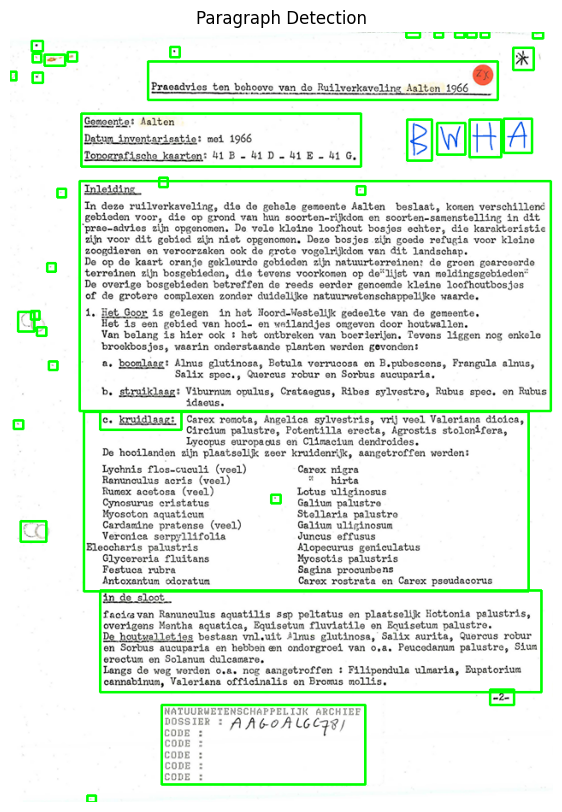

In [4]:

# Find contours to detect paragraphs
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy for visualization
segmented_image = image.copy()
paragraph_boxes = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    paragraph_boxes.append((x, y, w, h))
    cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display detected paragraphs
plt.figure(figsize=(10, 10))
plt.title("Paragraph Detection")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# Word Word Segmentation

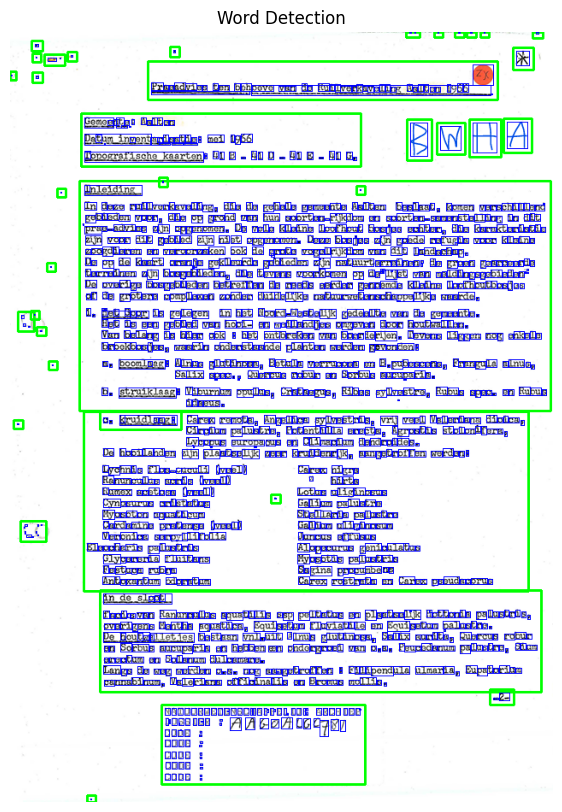

In [6]:
# Word Segmentation
# Detect words within each line of text
word_boxes = []

for (x, y, w, h) in paragraph_boxes:
    # Focus on the paragraph ROI for better accuracy
    paragraph_roi = binary[y:y + h, x:x + w]
    
    # Line segmentation using horizontal projections
    hist = cv2.reduce(paragraph_roi, 1, cv2.REDUCE_AVG).reshape(-1)
    th = 2  # Threshold to detect text lines
    line_start = None
    lines = []
    
    for i, val in enumerate(hist):
        if val > th and line_start is None:
            line_start = i
        elif val <= th and line_start is not None:
            line_end = i
            lines.append((x, y + line_start, w, line_end - line_start))
            line_start = None

    # Detect words within each line
    for lx, ly, lw, lh in lines:
        line_roi = binary[ly:ly + lh, lx:lx + lw]
        word_contours, _ = cv2.findContours(line_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for word_contour in word_contours:
            wx, wy, ww, wh = cv2.boundingRect(word_contour)
            word_boxes.append((lx + wx, ly + wy, ww, wh))
            cv2.rectangle(segmented_image, (lx + wx, ly + wy), (lx + wx + ww, ly + wy + wh), (255, 0, 0), 1)

# Display detected words
plt.figure(figsize=(10, 10))
plt.title("Word Detection")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


## OCR on Paragraphs

In [5]:

# Perform OCR on each detected paragraph
optimized_text_results = []
for (x, y, w, h) in paragraph_boxes:
    paragraph_roi = gray[y:y + h, x:x + w]
    ocr_result = pytesseract.image_to_string(paragraph_roi, config='--psm 6')  # Paragraph mode
    optimized_text_results.append(ocr_result.strip())

# Combine all text
final_text = "\n\n".join(optimized_text_results)

# Save or print the final output
print(final_text)




jose AR OA LGCea
Bossier =

tongs | AGA LC CRY/
Cope

cone :

cope

cone

2e

Ande sloot_

facia van Ranunculus aqustilis ssp poltatus on plaatsolie Hottonis palustris,
cverigens Menthe aquatica, Equlsctun fluviatile on Bquisotun palustre.
Dovhoutwaliotios bostoan vni,uit Aims glutinosa, Salix surita, Giorcus rotur
en Sorbus aucupsria en hebben en ondergroei van 0.8, Peucedanum palustre, Siu
srectin on Solanin dileanare,

Langs de weg worden oa. nog asngetroffen : Filipendula ulmaria, Bupatoriua
cannabinun, Valoriana officinalis on Broms nollis.

co





ce. Kruidlasg: Carex romota, Angelica sylvestris, vrij veol Valeriana dioica,
Girciua palustre, Fotentilla erecta, Agrostis stolonifora,
Iycopns europacis on Clinaciun dendvoides.

Do hooilandon ain plaatsolik geor kruidenrik, sangetroffen werden:

Iychnis flos-cuculi (veel) Carex nigra

Ranunculus acris (veel) = hirta

Runex acotosa (veel) Lotus uliginosus

Cynosurus eristatue Galiua palustre

Myosoton aquaticus Stollaria palustre



# Match with code

In [ ]:
import pytesseract
from PIL import Image
import pandas as pd

# Load the dataset
dataset = [
    {
        "Nr": "1",
        "Naam object": "Westduinpark",
        "Naam planeenheid": "Den Haag e.o.",
        "Naam beheergebied": "Stad en Duin",
        "Naam provinciale eenheid": "Zuid-Holland",
        "Oppervlak (m2)": "68670318.55",
        "PlaatsCode": "AAGOALGc781",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "2",
        "Naam object": "Kockengen",
        "Naam planeenheid": "Utrechtse Venen",
        "Naam beheergebied": "Utrecht-West",
        "Naam provinciale eenheid": "Utrecht",
        "Oppervlak (m2)": "47818921.16",
        "PlaatsCode": "KOCK",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "3",
        "Naam object": "De Ven",
        "Naam planeenheid": "IJsselmeeroevers",
        "Naam beheergebied": "De Kop",
        "Naam provinciale eenheid": "Noord-Holland",
        "Oppervlak (m2)": "11544634.71",
        "PlaatsCode": "DVEN",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    }
]

# Load the image
image_path = 'temp/page_01.png'  # Replace with your local image path
image = Image.open(image_path)

# Perform OCR with the Dutch language
ocr_result = pytesseract.image_to_string(image, lang='nld')

# Find matches in the dataset
matches = []
for record in dataset:
    for key, value in record.items():
        if value and value in ocr_result:
            matches.append(record)
            break

# Display matches
matches_df = pd.DataFrame(matches)
print(matches_df)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mbhst\\Desktop\\Workspace\\MachineLearning\\RangerGIS-Archive\\path_to_your_image.png'